In [24]:
from random import seed
from random import randint
import pandas as pd
import numpy as np
import numdifftools as nd
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

GENERATED DATA SET:

In [25]:
# Create a random data set
n_samples, n_features = 1000, 1
rng = np.random.RandomState(0)
y = rng.randn(n_samples).reshape(-1, 1)
X = rng.randn(n_samples, n_features)
X_bias = np.c_[np.ones((len(X), 1)), X]
print("X = ", X_bias)
print("y = ", y)

X =  [[ 1.          0.55596268]
 [ 1.          0.89247389]
 [ 1.         -0.42231482]
 ...
 [ 1.          0.15843385]
 [ 1.         -1.14190142]
 [ 1.         -1.31097037]]
y =  [[ 1.76405235e+00]
 [ 4.00157208e-01]
 [ 9.78737984e-01]
 [ 2.24089320e+00]
 [ 1.86755799e+00]
 [-9.77277880e-01]
 [ 9.50088418e-01]
 [-1.51357208e-01]
 [-1.03218852e-01]
 [ 4.10598502e-01]
 [ 1.44043571e-01]
 [ 1.45427351e+00]
 [ 7.61037725e-01]
 [ 1.21675016e-01]
 [ 4.43863233e-01]
 [ 3.33674327e-01]
 [ 1.49407907e+00]
 [-2.05158264e-01]
 [ 3.13067702e-01]
 [-8.54095739e-01]
 [-2.55298982e+00]
 [ 6.53618595e-01]
 [ 8.64436199e-01]
 [-7.42165020e-01]
 [ 2.26975462e+00]
 [-1.45436567e+00]
 [ 4.57585173e-02]
 [-1.87183850e-01]
 [ 1.53277921e+00]
 [ 1.46935877e+00]
 [ 1.54947426e-01]
 [ 3.78162520e-01]
 [-8.87785748e-01]
 [-1.98079647e+00]
 [-3.47912149e-01]
 [ 1.56348969e-01]
 [ 1.23029068e+00]
 [ 1.20237985e+00]
 [-3.87326817e-01]
 [-3.02302751e-01]
 [-1.04855297e+00]
 [-1.42001794e+00]
 [-1.70627019e+00]
 [ 1.

GRADIENT DESCENT:

In [26]:
# Simple gradient descent

def cost(p, X, y):
    pred = X.dot(p)
    return (1/2*len(y)) * np.sum(np.square(pred - y))
                                 
def gradient_descent(X, y, p, learning_rate=0.01, iterations=1):
    costs = np.zeros(iterations)
    
    for i in range(iterations):
        pred = np.dot(X, p)
        p = p - (1/len(y))*learning_rate*( X.T.dot((pred - y)))
        costs[i] = cost(p, X, y)
        
    return p, costs
        

In [27]:
(p, costs) = gradient_descent(X_bias, y, np.random.randn(2, 1), learning_rate=0.01, iterations=500)
print(p, costs)

[[-0.03917518]
 [-0.03309366]] [843343.07253557 836257.28944758 829312.30171916 822505.31095868
 815833.57440866 809294.40383936 802885.16446454 796603.2738787
 790446.20101546 784411.46512668 778496.63478185 772699.32688747
 767017.2057258  761447.98201284 755989.41197501 750639.29644417
 745395.47997067 740255.84995404 735218.33579096 730280.90804014
 725441.5776039  720698.39492596 716049.44920515 711492.86762489
 707026.81459784 702649.49102569 698359.13357358 694154.01395906
 690032.43825507 685992.74620687 682033.31056251 678152.53641665
 674348.86056739 670620.75088593 666966.70569873 663385.25318198
 659874.95076813 656434.38456416 653062.1687815  649756.94517722
 646517.38250636 643342.17598516 640230.04676498 637179.7414166
 634190.03142488 631259.71269341 628387.60505902 625572.55181596
 622813.41924951 620109.0961789  617458.49350933 614860.5437928
 612314.20079785 609818.43908765 607372.25360667 604974.65927542
 602624.69059336 600321.4012496  598063.86374147 595851.169000

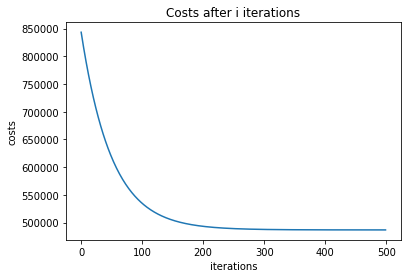

In [28]:
# x axis values
x = range(0, 500)
# corresponding y axis values
y = costs
  
# plotting the points 
plt.plot(x, y)
  
# naming the x axis
plt.xlabel('iterations')
# naming the y axis
plt.ylabel('costs')
  
# giving a title to my graph
plt.title('Costs after i iterations')
  
# function to show the plot
plt.show()

SIMULATION:

In [29]:
class simulationWthTopology:
    
    def __init__(self, topology, nb_iter, X_bias_split, y_split):
        self.topology = topology
        self.nb_iter = nb_iter
        self.p_nexts = np.zeros((2, len(self.topology)))
        self.X_bias_split = X_bias_split
        self.y_split = y_split
        
    def start(self):
        all_costs = np.zeros((len(self.topology), self.nb_iter))
        for i in range(self.nb_iter):
            ps = []
            for nd in range(len(self.topology)):
                p, cost = gradient_descent(self.X_bias_split[nd], self.y_split[nd], self.p_nexts[nd].reshape(-1, 1), learning_rate=0.01, iterations=1)
                ps.append(p)
                all_costs[nd][i] = cost
            for nd in range(len(self.topology)):
                for neigh in range(len(self.topology[nd]) - 1):
                    self.p_nexts[self.topology[neigh + 1]] = ps[nd]
        return p, all_costs
                
                
                
                

In [30]:
# We split de data into batches
X_split_bias = np.array_split(X_bias, 2)
y_split = np.array_split(X_bias, 2)

topology = [[0, 1], [1, 0]]

sim = simulationWthTopology(topology, 100, X_split_bias, y_split)
p, all_costs = sim.start()

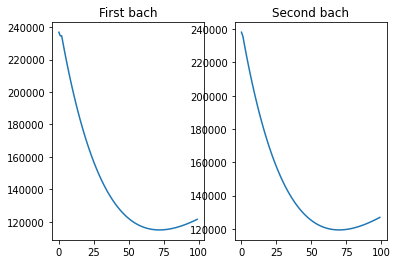

In [31]:
# x axis values
x = range(0, 100)
# corresponding y axis values
y1 = all_costs[0]
y2 = all_costs[1]

figure, axis = plt.subplots(1, 2)
  
# For Sine Function
axis[0].plot(x, y1)
axis[0].set_title("First bach")
  
# For Cosine Function
axis[1].plot(x, y2)
axis[1].set_title("Second bach")
  
# Combine all the operations and display
plt.show()